---
title: "MLE and summary statistics"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

Let's do the following exercise. Suppose we have $n$ iid observations $x$ from a model with parameters $\theta$. Using the definition of the log likelihood, derive the maximum likelihood estimator for $\theta$.

## exponential distribution revisited

We can now revisit our original example of estimating the rate parameter $\lambda$ of an exponential distribution using maximum likelihood estimation. Recall that the joint probability density function of the exponential distribution is given by:
$$
f(x, \lambda) = \lambda e^{-\lambda x}.
$$
The log likelihood reads:

\begin{align*}
\ell(\lambda \mid x_{1:n}) &= \sum_{i=1}^{n} \log f(x_i, \lambda) \\
&= \sum_{i=1}^{n} \left( \log \lambda - \lambda x_i \right) \\
&= n \log \lambda - \lambda \sum_{i=1}^{n} x_i.
\end{align*}
To find the maximum likelihood estimator for $\lambda$, we take the derivative of the log likelihood with respect to $\lambda$ and set it to zero:

\begin{align*}
\frac{d\ell}{d\lambda} &= \frac{n}{\lambda} - \sum_{i=1}^{n} x_i = 0.
\end{align*}

Solving for $\lambda$ gives:
$$
\hat{\lambda} = \frac{n}{\sum_{i=1}^{n} x_i} = \frac{1}{\bar{x}},
$$
where $\bar{x}$ is the sample mean of the observed data. This result aligns with our previous derivation using the likelihood function directly.

Let's plot the log likelihood surface (the joint probability distribution), and we'll see how the four reasons for using the log likelihood come into play.

In [2]:
#| code-summary: "import libraries"
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, uniform, norm

0.7 was the ideal lambda used to generate the data.
0.738 is the MLE estimate of lambda from the data.


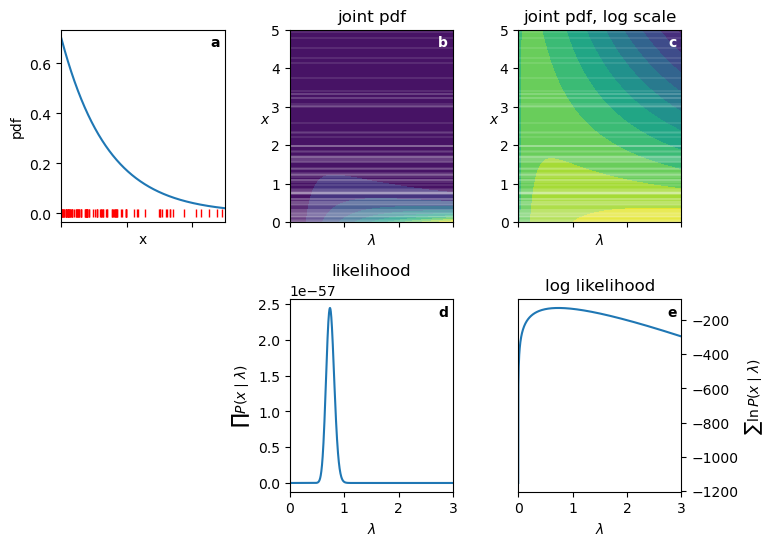

In [3]:
pdf_expon = lambda x, lambd: lambd * np.exp(-lambd * x) * (x >= 0)
fig, ax = plt.subplots(2,3, figsize=(8,6), sharex='col')
fig.subplots_adjust(wspace=0.4, hspace=0.4)
ax[1,0].set_axis_off()
x = np.linspace(0, 5, 1000)
lmbda = np.linspace(1e-5, 3, 1000)

ideal_lambda = 0.7
np.random.seed(seed=1)
data = expon.rvs(size=100, scale=1/ideal_lambda)

ax[0,0].plot(x, pdf_expon(x, ideal_lambda))
ax[0,0].plot(data, np.zeros_like(data), ls='None', marker='|', color='red')
ax[0,0].set(xlabel='x', ylabel='pdf')

LAM, X = np.meshgrid(lmbda, x)
Z = pdf_expon(X, LAM)
ax[0,1].contourf(LAM, X, Z, levels=10)

ax[0,2].contourf(LAM, X, np.log(Z), levels=10)

like = [np.prod(pdf_expon(data, l)) for l in lmbda]
log_like = [np.sum(np.log(pdf_expon(data, l))) for l in lmbda]
ax[1,1].plot(lmbda, like)
ax[1,2].plot(lmbda, log_like)

for i, xx in enumerate(data):
    ax[0,1].axhline(xx, color='white', ls='-', alpha=0.1)
    ax[0,2].axhline(xx, color='white', ls='-', alpha=0.1)

print(f"{ideal_lambda} was the ideal lambda used to generate the data.")
print(f"{1/np.mean(data):.3f} is the MLE estimate of lambda from the data.")


ax[0,0].set(xlim=(0, 5))
ax[0,1].set(ylim=(0, 5),
            xlim=(0, 3),
            title="joint pdf",
            xlabel=r"$\lambda$",
            )
ax[0,1].set_ylabel(r"$x$", rotation=0)
ax[0,2].set(ylim=(0, 5),
            xlim=(0, 3),
            title="joint pdf, log scale",
            xlabel=r"$\lambda$",
            )
ax[0,2].set_ylabel(r"$x$", rotation=0)
ax[1,1].set(title="likelihood",
             xlabel=r"$\lambda$",
             ylabel=r"$\prod P(x\mid\lambda)$")
ax[1,2].yaxis.tick_right()
ax[1,2].yaxis.set_label_position("right")
ax[1,2].set(title="log likelihood",
             xlabel=r"$\lambda$",
             ylabel=r"$\sum \ln P(x\mid\lambda)$")
ax[0,0].text(0.97, 0.97, r"a", transform=ax[0,0].transAxes,
         horizontalalignment='right', verticalalignment='top',
         fontweight="bold")
ax[0,1].text(0.97, 0.97, r"b", transform=ax[0,1].transAxes,
         horizontalalignment='right', verticalalignment='top',
         fontweight="bold", color="white")
ax[0,2].text(0.97, 0.97, r"c", transform=ax[0,2].transAxes,
         horizontalalignment='right', verticalalignment='top',
         fontweight="bold", color="white")
ax[1,1].text(0.97, 0.97, r"d", transform=ax[1,1].transAxes,
         horizontalalignment='right', verticalalignment='top',
         fontweight="bold")
ax[1,2].text(0.97, 0.97, r"e", transform=ax[1,2].transAxes,
         horizontalalignment='right', verticalalignment='top',
         fontweight="bold");

* **Panel a:** graph of the exponential PDF for $\lambda=0.7$. I drew 100 random samples from this distribution, shown as small vertical red lines."
* **Panel b:** joint probability distribution in the space of $x$ and $\lambda$. The horizontal white lines correspond to the observed data points. The Brighter colors represent higher values.
* **Panel c:** log joint probability distribution in the space of $x$ and $\lambda$. Note how it is much easier to see the structure of the surface.
* **Panel d:** likelihood as a function of $\lambda$ for the observed data. How to read this: for each value of $\lambda$ on the x-axis, look up to see where it intersects each of the horizontal white lines in panel b, read off the corresponding probability density values, and multiply them together to get the likelihood value at that $\lambda$. Note the following:
  1. The curve is extremely steep near the peak.
  2. The likelihood values are very small.
* **Panel e:** log likelihood as a function of $\lambda$ for the observed data. Note the following:
  1. The curve is much smoother.
  2. The log likelihood values are in a "manageable" range.
  3. The maximum occurs at the same $\lambda$ value as in panel d.

Because this problem has only one parameter, all we have to do to find the MLE is to find the peak of the curve in panel e. We can do this analytically by taking the derivative of the log likelihood function we derived above, or numerically using optimization methods. For 100 data points drawn from an exponential distribution with $\lambda=0.7$, the MLE estimate of $\lambda$ is approximately 0.0.738, which is close to the true value.

The same ideas shown here apply to all the examples below. For models with more than one parameter, the log likelihood surface becomes a multi-dimensional surface, and we cannot visualize it easily. However, the principles remain the same: we seek the set of parameters $\{\theta_1, \theta_2, \ldots, \theta_k\}$ that maximize the log likelihood.

## normal distribution

The normal distribution is defined by two parameters: the mean $\mu$ and the standard deviation $\sigma$. As an example, consider measuring the heights of a group of people. We can assume that the heights are normally distributed with some unknown mean and standard deviation.

Its joint probability density function is given by:
$$
f(x; \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right).
$$

The log likelihood reads:

\begin{align*}
\ell(\mu, \sigma \mid x_{1:n}) &= \sum_{i=1}^{n} \log f(x_i; \mu, \sigma) \\
&= \sum_{i=1}^{n} \log \left( \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right) \right) \\
&= \sum_{i=1}^{n} \left( -\log(\sigma \sqrt{2\pi}) - \frac{(x_i - \mu)^2}{2\sigma^2} \right) \\
&= -n \log(\sigma) -n \log(\sqrt{2\pi}) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2.
\end{align*}

Maximizing the log likelihood with respect to $\mu$ and $\sigma$ involves taking partial derivatives, setting them to zero, and solving for the parameters.

For $\mu$, we have:

\begin{align*}
\frac{\partial \ell}{\partial \mu} &= \frac{1}{\sigma^2} \sum_{i=1}^{n} (x_i - \mu) \\
&= \frac{1}{\sigma^2} \left( \sum_{i=1}^{n} x_i - n\mu \right) = 0.
\end{align*}

Solving for $\mu$ gives:
$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} x_i,
$$
which is the sample mean.

Now, for $\sigma$, we have:

\begin{align*}
\frac{\partial \ell}{\partial \sigma} &= -\frac{n}{\sigma} + \frac{1}{\sigma^3} \sum_{i=1}^{n} (x_i - \mu)^2 \\
&= \frac{1}{\sigma^3} \left( -n\sigma^2 + \sum_{i=1}^{n} (x_i - \mu)^2 \right) = 0.
\end{align*}

Solving for $\sigma$ gives:
$$
\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \hat{\mu})^2,
$$
which is the sample variance (using $n$ in the denominator for MLE).

Going back to the height example, our MLEs for the mean and standard deviation of heights are simply the sample mean and sample standard deviation of the observed heights.

## binomial distribution

The binomial distribution models the number of successes in $n$ independent Bernoulli trials, each with success probability $p$. A very common example is flipping a biased coin, whose probability of yielding heads is $p$, flipping it $n$ times and counting the number of heads $k$.
Its joint probability mass function is given by:
$$
P(X = k; n, p) = \binom{n}{k} p^k (1 - p)^{n - k}.
$$
The log likelihood reads:

\begin{align*}
\ell(p \mid k, n) &= \log P(X = k; n, p) \\
&= \log \left( \binom{n}{k} p^k (1 - p)^{n - k} \right) \\
&= \log \binom{n}{k} + k \log p + (n - k) \log (1 - p).
\end{align*}

To find the maximum likelihood estimator for $p$, we take the derivative of the log likelihood with respect to $p$ and set it to zero:

\begin{align*}
\frac{d\ell}{dp} &= \frac{k}{p} - \frac{n - k}{1 - p} = 0.
\end{align*}

Solving for $p$ gives:
$$
\hat{p} = \frac{k}{n},
$$
which is the sample proportion of successes.
Going back to the coin example, if we flip the coin 100 times and get 60 heads, our MLE for $p$ would be $\hat{p} = 60/100 = 0.6$.

## Laplace distribution

The Laplace distribution, also known as the double exponential distribution, is characterized by its location parameter $\mu$ and scale parameter $b$. We use the normal distribution for 'well-behaved' data like human heights. We use the Laplace distribution for 'wild' data like stock market data, where outliers aren't just mistakes—they are part of the system. For example, most days the price of a stock barely moves, but rare events (market crashes or surges) happen much more often than a Normal distribution would allow.

Its joint probability density function is given by:
$$
f(x; \mu, b) = \frac{1}{2b} \exp\left(-\frac{|x - \mu|}{b}\right).
$$

The log likelihood reads:

\begin{align*}
\ell(\mu, b \mid x_{1:n}) &= \sum_{i=1}^{n} \log f(x_i; \mu, b) \\
&= \sum_{i=1}^{n} \log \left( \frac{1}{2b} \exp\left(-\frac{|x_i - \mu|}{b}\right) \right) \\
&= \sum_{i=1}^{n} \left( -\log(2b) - \frac{|x_i - \mu|}{b} \right) \\
&= -n \log(2b) - \frac{1}{b} \sum_{i=1}^{n} |x_i - \mu|.
\end{align*}

Maximizing the log likelihood with respect to $\mu$ and $b$ involves taking partial derivatives, setting them to zero, and solving for the parameters.

For $\mu$, we have:

\begin{align*}
\frac{\partial \ell}{\partial \mu} &= \frac{1}{b} \sum_{i=1}^{n} \text{sgn}(x_i - \mu) = 0,
\end{align*}
where $\text{sgn}(x)$ is the sign function, which returns -1 for negative values, 1 for positive values, and 0 for zero.

Solving for $\mu$ is essentially a balancing act. It requires us finding a value for $\mu$ such that the number of positive ones (points above $\mu$) exactly cancels out the number of negative ones (points below $\mu$). This happens when $\mu$ is the median of the data:
$$
\hat{\mu} = \text{median}(x_{1:n}).
$$


Now, for $b$, we have:

\begin{align*}
\frac{\partial \ell}{\partial b} &= -\frac{n}{b} + \frac{1}{b^2} \sum_{i=1}^{n} |x_i - \mu| = 0.
\end{align*}

Solving for $b$ gives:
$$
\hat{b} = \frac{1}{n} \sum_{i=1}^{n} |x_i - \hat{\mu}|,
$$
which is the mean absolute deviation (MAD) from the median. This measure of spread is more robust to outliers than the standard deviation.

Going back to the stock market example, our MLEs for the location and scale parameters are simply the sample median and mean absolute deviation from the median of the observed returns.

## Poisson distribution

The Poisson distribution models the number of events occurring in a fixed interval of time or space, given a known average rate of occurrence $\lambda$. A common example is counting the number of emails received in an hour, or the number of radioactive decays detected in a piece of radioactive material over a certain period.
Its joint probability mass function is given by:
$$
P(X = k, \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}.
$$
The log likelihood reads:

\begin{align*}
\ell(\lambda \mid k_{1:n}) &= \sum_{i=1}^{n} \log P(X = k_i, \lambda) \\
&= \sum_{i=1}^{n} \left( k_i \log \lambda - \lambda - \log(k_i!) \right) \\
&= \left(\sum_{i=1}^{n} k_i \right) \log \lambda - n \lambda - \sum_{i=1}^{n} \log(k_i!).
\end{align*}

To find the maximum likelihood estimator for $\lambda$, we take the derivative of the log likelihood with respect to $\lambda$ and set it to zero:

\begin{align*}
\frac{d\ell}{d\lambda} &= \frac{\sum_{i=1}^{n} k_i}{\lambda} - n = 0.
\end{align*}

Solving for $\lambda$ gives:
$$
\hat{\lambda} = \frac{1}{n} \sum_{i=1}^{n} k_i,
$$
which is the sample mean of the observed counts.

## uniform distribution

The uniform distribution models a situation where all outcomes in a given range are equally likely. A common example is rolling a fair die, where each face (1 through 6) has an equal probability of landing face up.
Its joint probability density function is given by:
$$
f(x; a, b) = \frac{1}{b - a} \text{ for } a \leq x \leq b.
$$

The log likelihood reads:

\begin{align*}
\ell(a, b \mid x_{1:n}) &= \sum_{i=1}^{n} \log f(x_i; a, b) \\
&= \sum_{i=1}^{n} \log \left( \frac{1}{b - a} \right) \\
&= -n \log(b - a).
\end{align*}

In this instance, it is much easier to find the maximum likelihood estimators for $a$ and $b$ using the probability density function directly, rather than taking derivatives of the log likelihood. The likelihood reads:
$$
L(a, b \mid x_{1:n}) = \left( \frac{1}{b - a} \right)^n.
$$

The likelihood doesn't have a peak in the usual sense; it increases as the interval $[a, b]$ narrows. In order to maximize the likelihood, the interval must be as small as possible while still containing all observed data points. If at least one data point falls outside the interval, the likelihood becomes zero, because the uniform distribution assigns zero probability to values outside $[a, b]$, and the product of probabilities will include a zero term. The smallest interval that contains all observed data points is defined by the minimum and maximum of the data. Therefore,
$$
\hat{a} = \min(x_{1:n}), \quad \hat{b} = \max(x_{1:n}).
$$

## summary

By appliying the reasoning of maximum likelihood estimation to various probability distributions, we have derived the maximum likelihood estimators for their parameters. Notably, we found that:

* For the **exponential** distribution, the MLE is the reciprocal of the sample mean.
* For the **normal** distribution, the MLEs are the sample mean and sample standard deviation.
* For the **binomial** distribution, the MLE is the sample proportion of successes.
* For the **Laplace** distribution, the MLEs are the sample median and mean absolute deviation from the median.
* For the **Poisson** distribution, the MLE is the sample mean of the observed counts.
* For the **uniform** distribution, the MLEs are the sample minimum and sample maximum.

All these estimators are intuitive and align with common summary statistics used in data analysis, highlighting the deep connection between maximum likelihood estimation and descriptive statistics.